In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df=df[df['job_title_short']=='Data Analyst']

In [50]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg','median'),
    skill_count=('job_skills','count'),
)

skill_count =20
skills_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)
skill_stats

,median_salary,skill_count
job_skills,,
airflow,111175.0,2002
airtable,90000.0,88
alteryx,105000.0,4570
angular,109101.0,376
angular.js,NaN,2
...,...,...
wrike,75000.0,39
wsl,NaN,16
xamarin,NaN,2


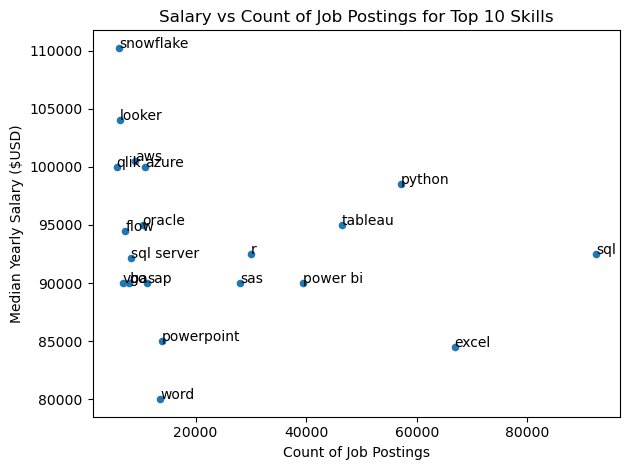

In [44]:
skills_stats.plot(kind='scatter',x='skill_count',y='median_salary')

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i,txt in enumerate (skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],  txt)

plt.show()

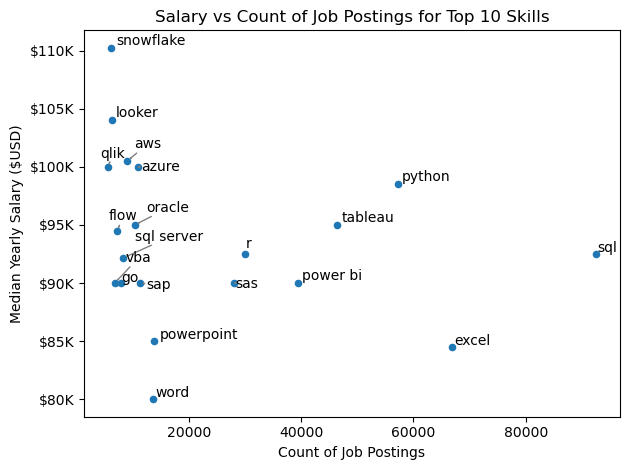

In [64]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter',x='skill_count',y='median_salary')

texts=[]
for i,txt in enumerate (skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],  txt))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='grey',lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()


plt.show()